# **TikTok Sentiment Analysis: Analyzing User Reviews**

The app revolutionized the way we watch short videos. Those enjoying short entertaining videos are familiar with this app. Not everybody is interested in this app. Some praise it while some critize it. Main goal of doing this TikTok Sentiment Analysis is:

1. **To asses user sentiment about the application, user reviews and comments.**
2. **To gain insights about how users feel about the app.**
3. **For developers to utilize it to develop the applications functionalities.**
4. **For business people to adjust their marketing strategies on TikTok.**


*Table of Contents*

i] Import Library

ii] Read the dataset

iii] Data preprocessing

iv] Sentiment Analysis

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CwenFernandes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


With the above libraries we can create eye-catching visualizations, remove uneccessary words, generate topic based colorsand evaluate text sentiment.

In [13]:
#Reading the data
data = pd.read_csv('tiktok_google_play_reviews.csv')

#Converting to dataframe
tiktok_data = pd.DataFrame(data)
tiktok_data.head(2)

C:\Users\CwenFernandes\AppData\Local\Temp\ipykernel_19220\4257270147.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('tiktok_google_play_reviews.csv')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN


It turns out that there are ten columns in the dataset, which include *reviewId*, *userName*, *userImage*, *content*, *score*, *thumbsUpCount*, *reviewCreatedVersion*, *at*, *replyContent*, and *revisedAt*. However, not all of the columns are used for sentiment analysis. 

In [14]:
sentiment_data = tiktok_data[["content", "score"]]

print(sentiment_data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [15]:
#Checking for null values
sentiment_data.isnull().sum()

content    31
score       0
dtype: int64

In [16]:
#Dropping null vales
sentiment_data = sentiment_data.dropna()

In [17]:
#Rechecking null values
sentiment_data.isnull().sum()

content    0
score      0
dtype: int64

Preparing data for analysis. Cleaning up text in content column to ensure accurate analysis.

In [18]:
stopword=set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["content"] = data["content"].apply(clean)

In [24]:
#Percentage of rating given to tiktok by google play store
ratings = sentiment_data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(sentiment_data,
               values=quantity,
               names=numbers,hole=0.5, title="Percentage of TikTok Ratings by Google Play Store")
figure.show()

TikTok has garnered an impressive rating 74%  of 5 star ratings with only 13.5% of 1 star ratings 

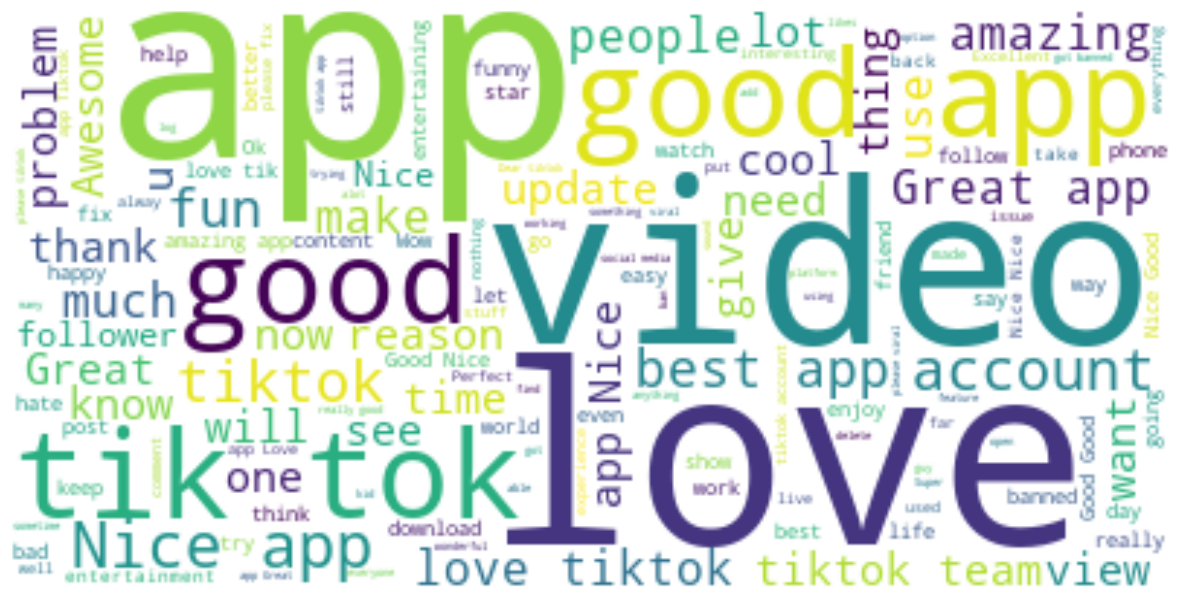

In [26]:
#Types of words used by TikTok Reviewers
text = " ".join(i for i in sentiment_data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

We have now reached the final step, sentiment analysis. Firstly, we’ll transform the score column into three new columns: Positive, Negative, and Neutral, based on the sentiment score of each user review. This is done in order to acquire a thorough grasp of the review. 

In [27]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
sentiment_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in sentiment_data["content"]]
sentiment_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in sentiment_data["content"]]
sentiment_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in sentiment_data["content"]] 

sentiment_data = sentiment_data[["content", "Positive", "Negative", "Neutral"]]
print(sentiment_data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CwenFernandes\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0                                           No words     0.000     0.688   
1                              Great fun app so far!     0.719     0.000   
2  The app would get a higher rating but I litera...     0.000     0.073   
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...     0.561     0.000   
4                                Pictures and record     0.000     0.000   

   Neutral  
0    0.312  
1    0.281  
2    0.927  
3    0.439  
4    1.000  


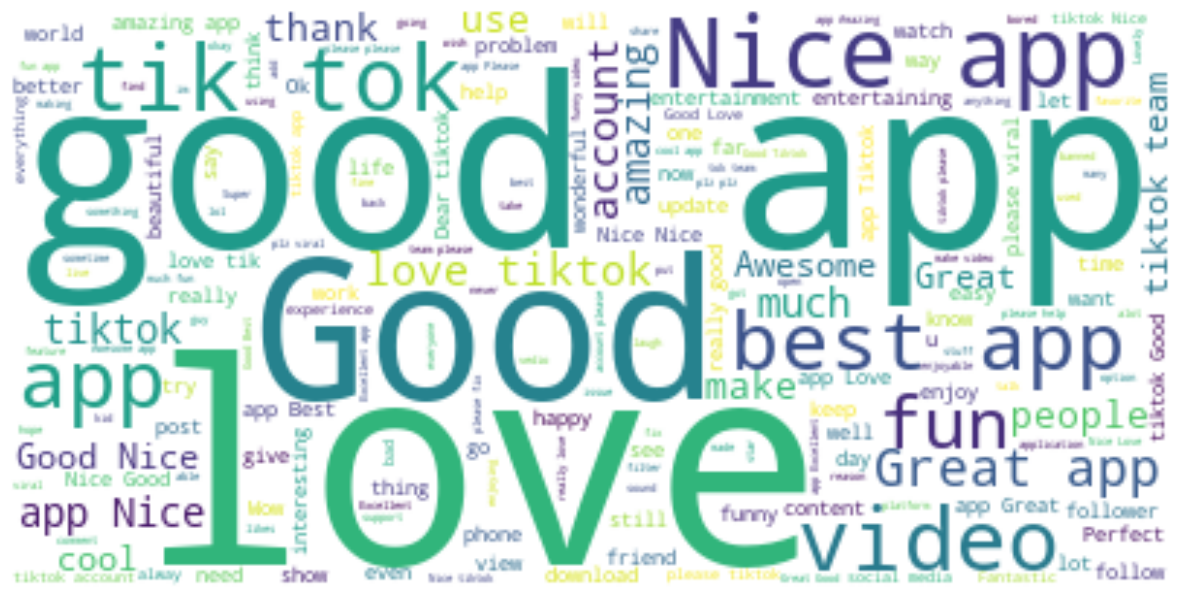

In [29]:
#words used in positive reviews in tiktok
positive =' '.join([i for i in sentiment_data['content'][sentiment_data['Positive'] > sentiment_data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

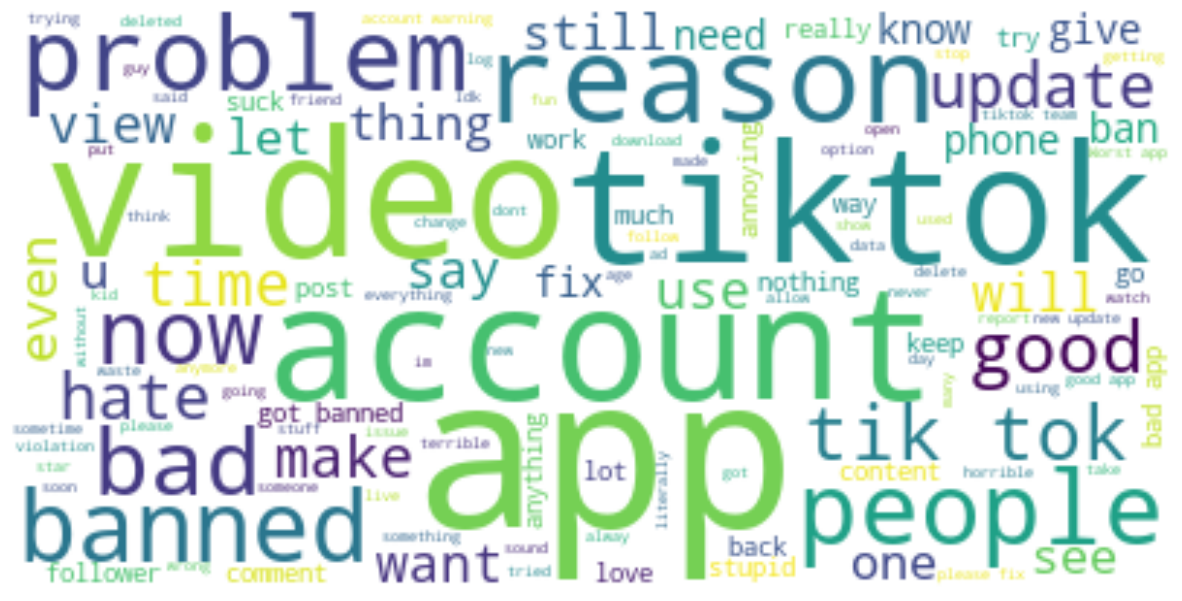

In [30]:
#words used in negative reviews in tiktok
negative =' '.join([i for i in sentiment_data['content'][sentiment_data['Negative'] > sentiment_data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()